# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `species` using the other variables in the dataset.

**Dummify** all variables that require this.

In [127]:
import pandas as pd
import numpy as np
import plotnine as p9
from palmerpenguins import load_penguins
import matplotlib.pyplot as plt


from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.compose import ColumnTransformer

from sklearn.metrics import r2_score , mean_squared_error, accuracy_score
from sklearn.metrics import classification_report ,confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, roc_auc_score

from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier

In [60]:
dataset = load_penguins().dropna()

pen_df = pd.get_dummies(dataset.set_index('species', drop=False),columns = ["island", "sex"] ,dtype=float)

Let's use the other variables to predict `species`. Prepare your data and fit the following models on the entire dataset:

* Two kNN models (for different values of K)
* Two decision tree models (for different complexities of trees)

Compute the following, for each of your models, on test data. Keep in mind that you may need to stratify your creation of the training and test data.

* Confusion matrix
* Overall Accuracy
* Precision, Recall, AUC, and F1-score for each species

Create one ROC plot for the species of your choice.

In [61]:
X = pen_df.drop(columns="species")
y = pen_df["species"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

In [45]:
num_cols = ["bill_length_mm","bill_depth_mm","flipper_length_mm","body_mass_g"]
cat_cols = ["island_Biscoe", "island_Dream", "island_Torgersen", "sex_female", "sex_male"]

## KNN's: 

In [84]:
preprocess = ColumnTransformer([
    ("num", StandardScaler(), num_cols),
    ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols),
])

knn4  = Pipeline([("preprocess", preprocess),
                  ("knn", KNeighborsClassifier(n_neighbors=4))])
knn10 = Pipeline([("preprocess", preprocess),
                  ("knn", KNeighborsClassifier(n_neighbors=10))])

In [85]:
knn4.fit(X_train, y_train)
knn10.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['bill_length_mm',
                                                   'bill_depth_mm',
                                                   'flipper_length_mm',
                                                   'body_mass_g']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['island_Biscoe',
                                                   'island_Dream',
                                                   'island_Torgersen',
                                                   'sex_female',
                                                   'sex_male'])])),
                ('knn', KNeighborsClassifier(n_neighbors=10))])

In [86]:
y_knnpred4  = knn4.predict(X_test)
y_knnpred10 = knn10.predict(X_test)

print("K=4 neighbors  accuracy:",  accuracy_score(y_test, y_knnpred4))
print("K=10 neighbors accuracy:", accuracy_score(y_test, y_knnpred10))
print(classification_report(y_test, y_knnpred4))
print(classification_report(y_test, y_knnpred10))

K=4 neighbors  accuracy: 0.9850746268656716
K=10 neighbors accuracy: 1.0
              precision    recall  f1-score   support

      Adelie       1.00      0.97      0.98        29
   Chinstrap       0.93      1.00      0.97        14
      Gentoo       1.00      1.00      1.00        24

    accuracy                           0.99        67
   macro avg       0.98      0.99      0.98        67
weighted avg       0.99      0.99      0.99        67

              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00        29
   Chinstrap       1.00      1.00      1.00        14
      Gentoo       1.00      1.00      1.00        24

    accuracy                           1.00        67
   macro avg       1.00      1.00      1.00        67
weighted avg       1.00      1.00      1.00        67



## Descision Trees: 

In [62]:
Tree_5 = Pipeline([("preprocess", preprocess),
                  ("Tree", DecisionTreeClassifier(max_depth=5))])

Tree_10 = Pipeline([("preprocess", preprocess),
                  ("Tree", DecisionTreeClassifier(max_depth=10))])              

Tree_5.fit(X_train, y_train)
Tree_10.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['bill_length_mm',
                                                   'bill_depth_mm',
                                                   'flipper_length_mm',
                                                   'body_mass_g']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['island_Biscoe',
                                                   'island_Dream',
                                                   'island_Torgersen',
                                                   'sex_female',
                                                   'sex_male'])])),
                ('Tree', DecisionTreeClassifier(max_depth=10))])

In [71]:
y_treepred5  = Tree_5.predict(X_test)
y_treepred10 = Tree_10.predict(X_test)

print("K=5 depth accuracy:",  accuracy_score(y_test, y_treepred5))
print("K=10 depth accuracy:", accuracy_score(y_test, y_treepred10))
print(classification_report(y_test, y_treepred5))
print(classification_report(y_test, y_treepred10))

K=5 depth accuracy: 0.9253731343283582
K=10 depth accuracy: 0.9701492537313433
              precision    recall  f1-score   support

      Adelie       0.93      0.90      0.91        29
   Chinstrap       0.82      1.00      0.90        14
      Gentoo       1.00      0.92      0.96        24

    accuracy                           0.93        67
   macro avg       0.92      0.94      0.92        67
weighted avg       0.93      0.93      0.93        67

              precision    recall  f1-score   support

      Adelie       0.94      1.00      0.97        29
   Chinstrap       1.00      1.00      1.00        14
      Gentoo       1.00      0.92      0.96        24

    accuracy                           0.97        67
   macro avg       0.98      0.97      0.97        67
weighted avg       0.97      0.97      0.97        67



## confusion matrix: 

In [ ]:
labels = np.unique(np.concatenate([y_test, y_knnpred4, y_knnpred10, y_treepred5, y_treepred10]))

### knn 5: 

In [129]:
cm_knn4 = confusion_matrix(y_test, y_knnpred4, labels=labels)

cm_knn4_df = pd.DataFrame(cm_knn4, index=pd.Index(labels, name="true"),
                         columns=pd.Index(labels, name="pred"))
print(cm_knn4_df)


pred       Adelie  Chinstrap  Gentoo
true                                
Adelie         28          1       0
Chinstrap       0         14       0
Gentoo          0          0      24


### KNN 10: 

In [125]:
cm_knn10 = confusion_matrix(y_test, y_knnpred10, labels=labels)

cm_knn10_df = pd.DataFrame(cm_knn10, index=pd.Index(labels, name="true"),
                         columns=pd.Index(labels, name="pred"))
print(cm_knn10_df)


pred       Adelie  Chinstrap  Gentoo
true                                
Adelie         29          0       0
Chinstrap       0         14       0
Gentoo          0          0      24


### Tree 5:

pred       Adelie  Chinstrap  Gentoo
true                                
Adelie         26          3       0
Chinstrap       0         14       0
Gentoo          2          0      22


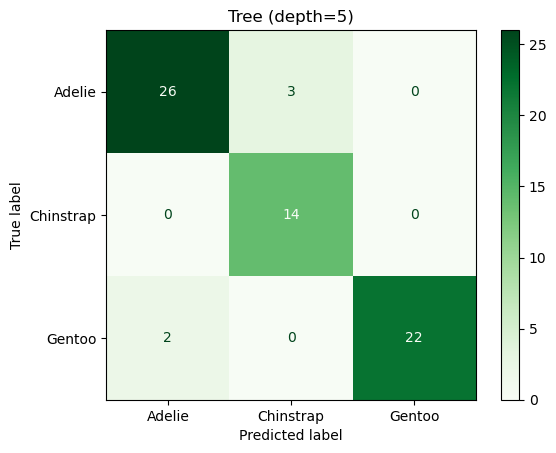

In [ ]:
cm_tree5 = confusion_matrix(y_test, y_treepred5, labels=labels)

cm_tree5_df = pd.DataFrame(cm_tree5, index=pd.Index(labels, name="true"),
                         columns=pd.Index(labels, name="pred"))
print(cm_tree5_df)

In [ ]:
cm_tree10 = confusion_matrix(y_test, y_treepred10, labels=labels)

cm_tree10_df = pd.DataFrame(cm_tree10, index=pd.Index(labels, name="true"),
                         columns=pd.Index(labels, name="pred"))
print(cm_tree10_df)

pred       Adelie  Chinstrap  Gentoo
true                                
Adelie         29          0       0
Chinstrap       0         14       0
Gentoo          2          0      22


Text(0.5, 1.0, 'Tree (depth = 10)')

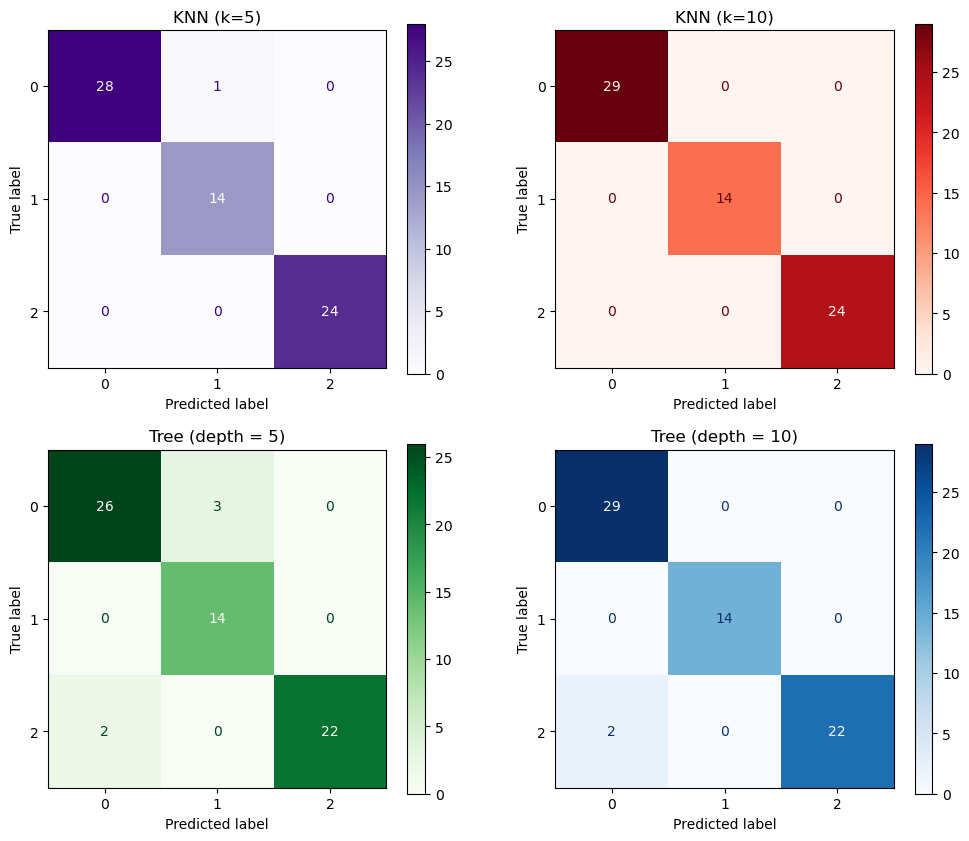

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

ConfusionMatrixDisplay(cm_knn4).plot(ax=axs[0,0], cmap="Purples",  values_format="d")
axs[0,0].set_title("KNN (k=4)")

ConfusionMatrixDisplay(cm_knn10).plot(ax=axs[0,1], cmap="Reds",  values_format="d")
axs[0,1].set_title("KNN (k=10)")

ConfusionMatrixDisplay(cm_tree5).plot(ax=axs[1,0], cmap="Greens",  values_format="d")
axs[1,0].set_title("Tree (depth = 5)")

ConfusionMatrixDisplay(cm_tree10).plot(ax=axs[1,1], cmap="Blues",  values_format="d")
axs[1,1].set_title("Tree (depth = 10)")

## ROC Plot for Adelie Penguins:

In [133]:
def ROC_for_species(model, X_test, y_test, species):

    y_score = model.predict_proba(X_test)

    if "Tree" in model.named_steps:
        classes_ = model.named_steps["Tree"].classes_
    elif "knn" in model.named_steps:
        classes_ = model.named_steps["knn"].classes_
    else:
        return(ModuleNotFoundError)
    
    i = list(classes_).index(species)
    y_score = y_score[:, i]

    y_true = (y_test == species).astype(int)

    fpr, tpr, _ = roc_curve(y_true, y_score)
    auc = roc_auc_score(y_true, y_score)

    return(fpr, tpr, auc)

In [137]:
knn_fpr4, knn_tpr4, knn_auc4 = ROC_for_species(knn4, X_test, y_test, "Adelie")
knn_fpr10, knn_tpr10, knn_auc10 = ROC_for_species(knn10, X_test, y_test, "Adelie")

Tree_fpr5, Tree_tpr5, Tree_auc5 = ROC_for_species(Tree_5, X_test, y_test, "Adelie")
Tree_fpr10, Tree_tpr10, Tree_auc10 = ROC_for_species(Tree_10, X_test, y_test, "Adelie")

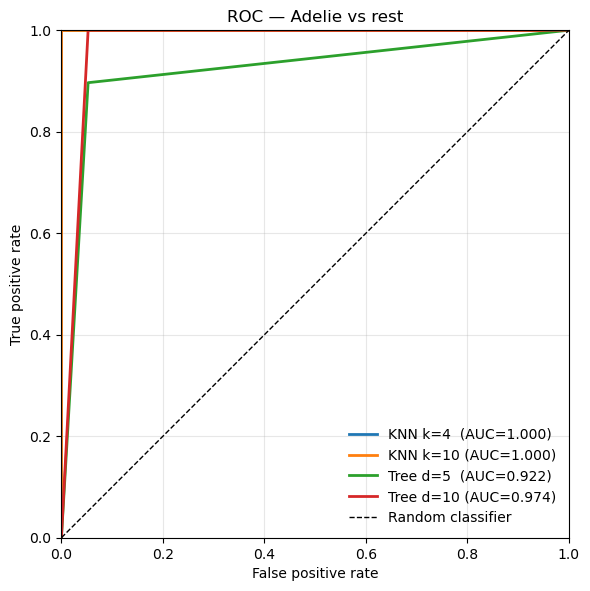

In [144]:
fig, ax = plt.subplots(figsize=(6,10))

ax.plot(knn_fpr4,  knn_tpr4,  linewidth=2, label=f"KNN k=4  (AUC={knn_auc4:.3f})")
ax.plot(knn_fpr10, knn_tpr10, linewidth=2, label=f"KNN k=10 (AUC={knn_auc10:.3f})")
ax.plot(Tree_fpr5,  Tree_tpr5,  linewidth=2, label=f"Tree d=5  (AUC={Tree_auc5:.3f})")
ax.plot(Tree_fpr10, Tree_tpr10, linewidth=2, label=f"Tree d=10 (AUC={Tree_auc10:.3f})")

ax.plot([0,1], [0,1], linestyle="--", color="k", linewidth=1, label="Random classifier")

ax.set_xlabel("False positive rate")
ax.set_ylabel("True positive rate")
ax.set_title("ROC — Adelie vs rest")
ax.set_xlim(0,1)
ax.set_ylim(0,1)
ax.set_aspect('equal', adjustable='box')
ax.grid(True, alpha=0.3)
ax.legend(loc="lower right", frameon=False)

plt.tight_layout()
plt.show()